# Project Business Statistics: E-news Express


## Problem Statement


**Business Context**

The advent of e-news, or electronic news, portals have offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [8]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [9]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Observations**

The codes ran above allow us to view the first and last five rows of the dataset. The row starts at index 0 and goes to index 99.

In [10]:
df.shape

(100, 6)

**Observations**

The code above presents us the number of rows and columns in numerical format as (rows, columns). We observe that there are 100 rows and 6 columns.

In [11]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations**

We observe that the minimum time spent on the landing page is 0.19 minutes. We know the units of time from the data dictionary. We also observe that the maximum amount of time spent on the landing page is 10.71 minutes. The average amount of time spent on the landing page is 5.3778 minutes.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**

The info() function in this line of code presents us with the properties of all the columns such as Index #, Column title, Non-Null Count, Data types,
and Memory Usage. We observe that there seems to be no missing values in the data frame. The chosen data types have numerical columns represented as integers and floating-point numbers. The categorical data are stored as objects.


In [13]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


**Observations**

We observe that there are no missing values.

In [14]:
df.duplicated().sum()

np.int64(0)

**Observations**

We can see that there are no duplicate values either.

### Univariate Analysis

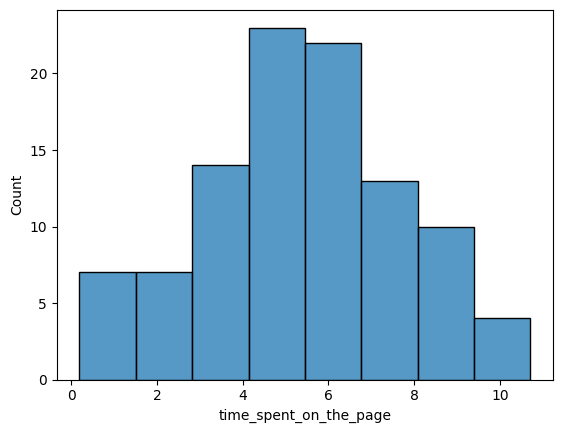

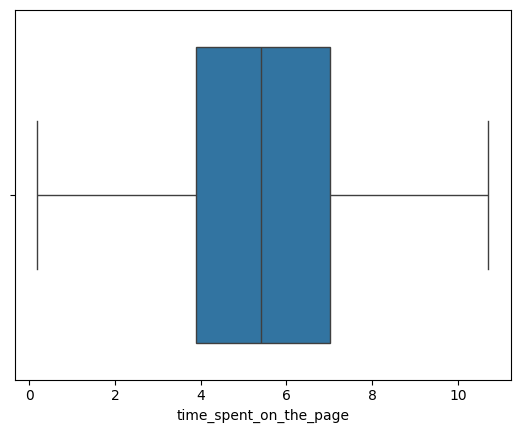

In [15]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

**Observations**

Here we created a histogram to visualize the distribution of the time spent on the landing page. We see a relatively normal distribution. We see minimal skewness and clustering, and an unimodal normal distribution.

In [16]:
df['group'].value_counts()


,count
group,
control,50
treatment,50


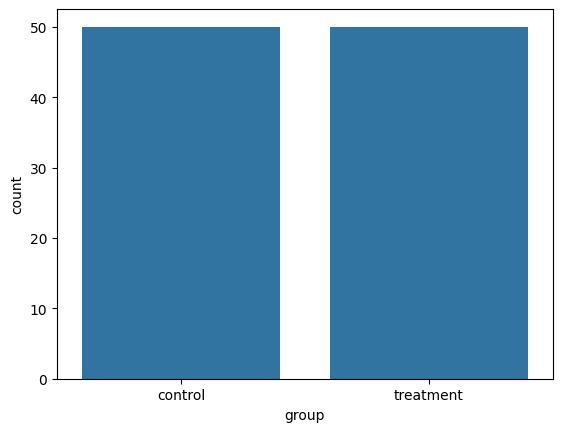

In [17]:
sns.countplot(data=df,x='group')
plt.show()

**Observations**

The distribution of the number of users across the two groups are the same.

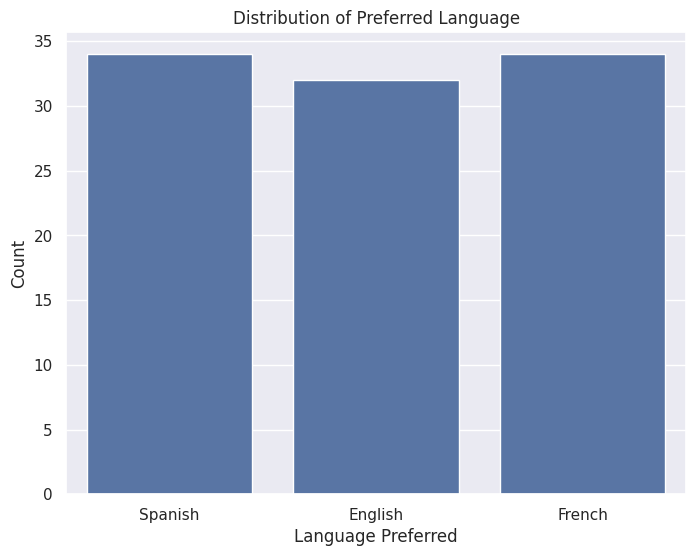

In [18]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(x='language_preferred', data=df)
plt.title('Distribution of Preferred Language')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.show()

**Observations**

Here we used a Bar Graph to depict the count of users who prefer each language. We see that there is nearly an equal count of Spanish and French preference at around 34 users. English is the least preferred at about 32 users.

### Bivariate Analysis

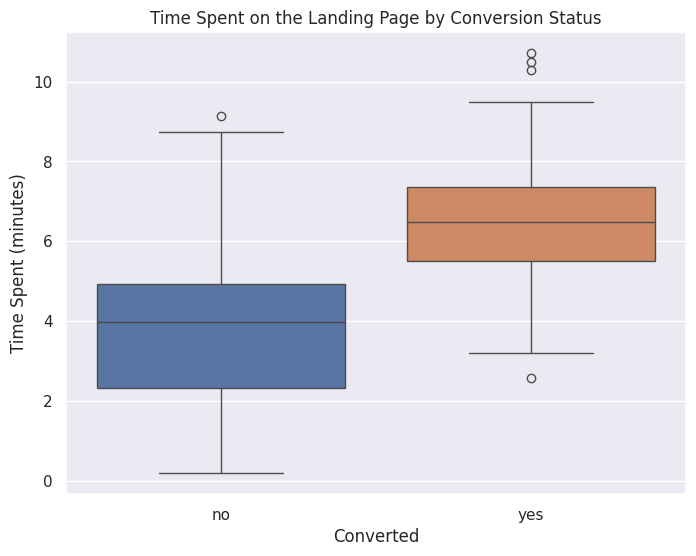

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='converted', y='time_spent_on_the_page', hue='converted', data=df)
plt.title('Time Spent on the Landing Page by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Time Spent (minutes)')
plt.show()

**Observations**

Here we created a box plot to visualize the time spent at each landing page across conversion status. We depict that those converted on average spent more minutes on the landing page versus those who did not convert; approximately 6.5 minutes versus 4 minutes. We also see more outliers for those who converted, and a narrower inter-quartile range.

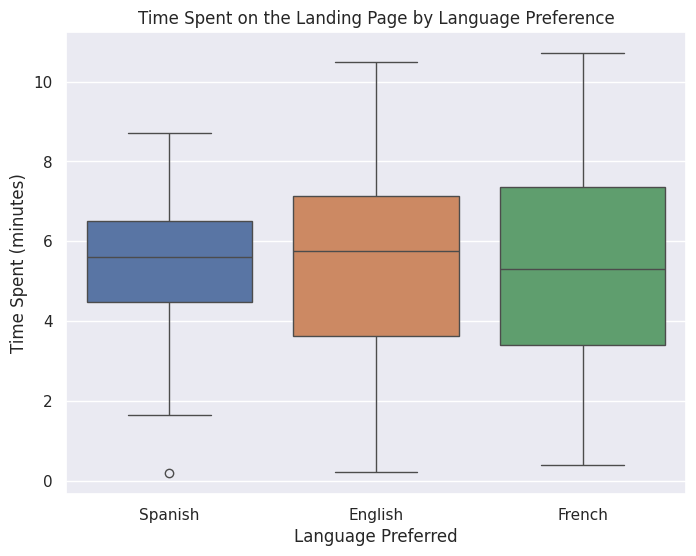

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', hue='language_preferred', data=df)
plt.title('Time Spent on the Landing Page by Language Preference')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent (minutes)')
plt.show()

**Observations**

We created a boxplot to visualize the time spent in minutes on the landing page acrosss the different preferred languages of Spanish, English, and French. We see a larger inter-quartile range for French followed by English, and then Spanish. English on average spent more minutes on the landing page at approximately 5.8 minutes, followed by Spanish at 5.5, and French at approximately 5.2.

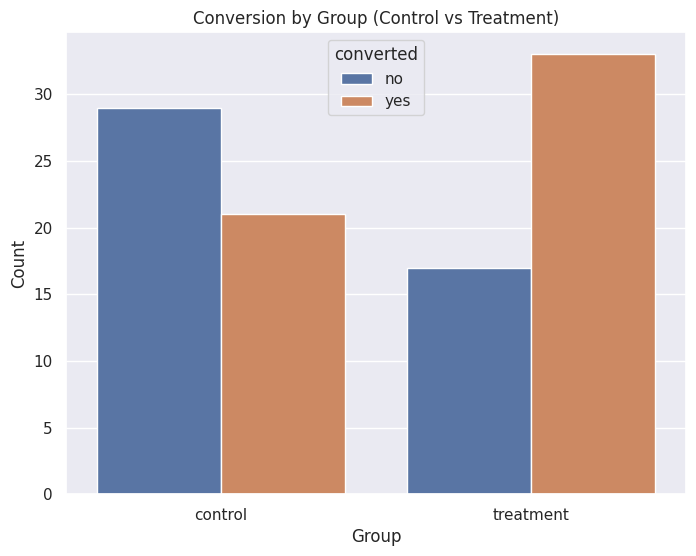

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='group', hue='converted', data=df)
plt.title('Conversion by Group (Control vs Treatment)')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

**Observations**

Here we created a Bar Plot to show the count of conversions for both of the treatment groups. We observe that more users converted in the treatment group than those who converted in the control group; approximately 33 in the treatment versus 21 in the control.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

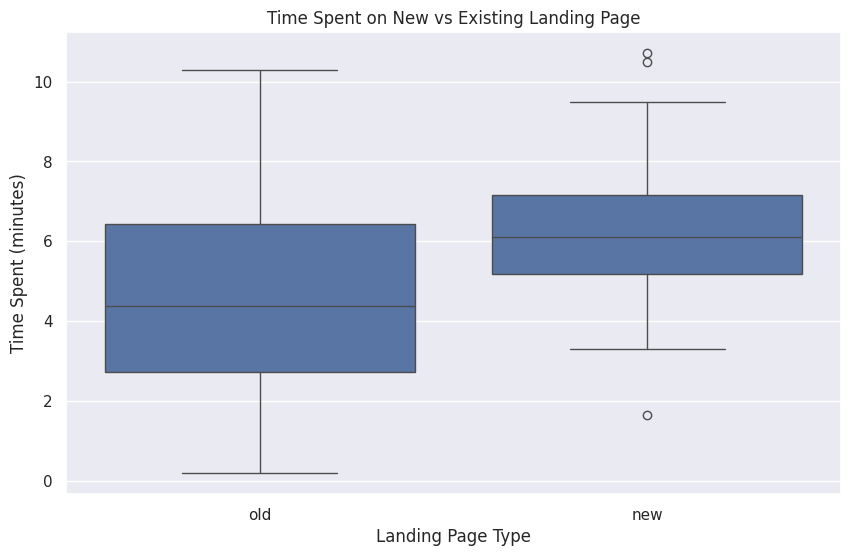

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on New vs Existing Landing Page')
plt.xlabel('Landing Page Type')
plt.ylabel('Time Spent (minutes)')
plt.show()

**Observations**

Looking at the boxplots above, we see that the new landing page has a higher median time spent on each landing page and a narrower inter-quartile range. The new landing page also contains outliers as compared to the old landing page.


### Step 1: Define the null and alternate hypotheses

**Null Hypothesis H0:** There is no difference in the amount of time spent by users on the new landing page compared to the existing landing page.

**Alternative Hypothesis H1:** The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.


### Step 3: Decide the significance level

The significance level (a) is going to be set as 0.5 which means that if the p-value is less than 0.05, the null hypothesis will be rejected.

### Step 4: Collect and prepare data

In [23]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [24]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Observations**

As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [25]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [26]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.

### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

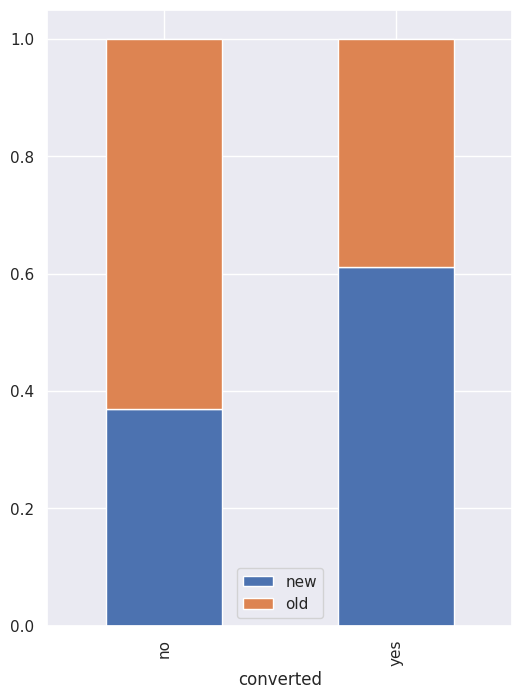

In [27]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

**Observations**

By observing the above plot, we can say that overall the number of users who get converted is more for the new page than the old page. Let's perform a hypothesis test to see if there is enough statistical evidence to say that the conversion rate for the new page is greater than the old page.

**Hypotheses**

Null Hypothesis H0: The conversion rate for the new landing page is equal to the conversion rate for the old landing page.

Alternative Hypothesis H1: The conversion rate for the new landing page is greater than the conversion rate for the old landing page.


**Observations**
We are doing a one-tailed test since we are testing if the new landing page conversion rate is greater than the old landing page conversion rate. This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two-sample proportion z-test will be the appropriate test for this problem

In [28]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


In [30]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


**Observations/Interpretation**


Since the p-value of 0.0080 is less than 0.05, we reject the null hypothesis. The conversion rate for the new landing page is significantly greater than the conversion rate for the old landing page.



## 3. Is the conversion and preferred language are independent or related?

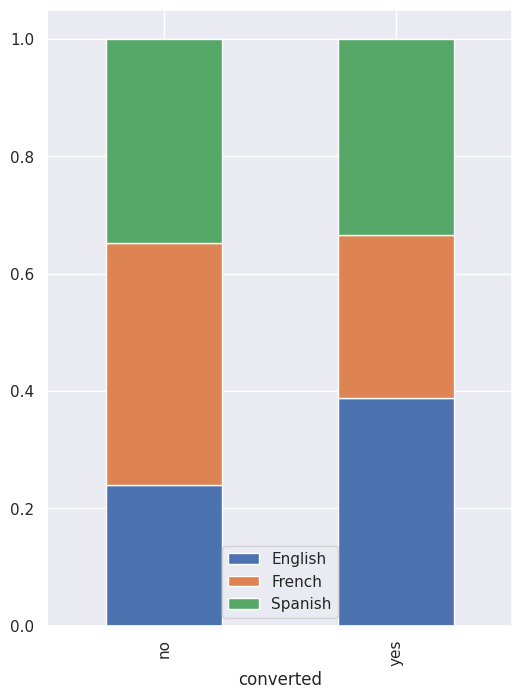

In [31]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),
                 stacked=True)
plt.legend()
plt.show()

The distribution of conversion status for English and French language users is not uniformly distributed. Let's perform the hypothesis test to check whether we have enough statistical evidence to say that the conversion status and preferred language are independent or not.

The null hypothesis is that the converted status is independent of the preferred language. The alternative hypothesis is that the converted status is not independednt of the preferred language.
This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.
As given in the problem statement, we select α = 0.05.


In [32]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [33]:
from scipy.stats import chi2_contingency
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language.




## 4. Is the time spent on the new page same for the different language users?

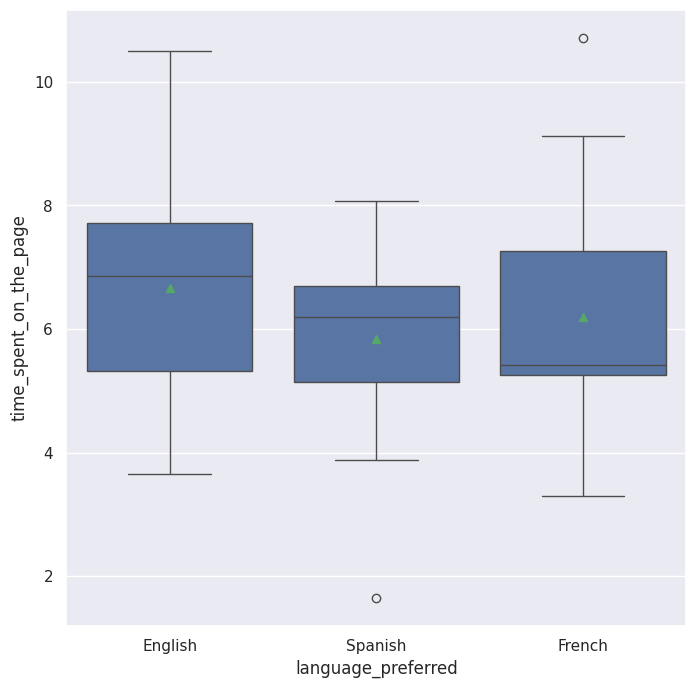

In [34]:
plt.figure(figsize=(8,8))
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [35]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


The mean time spent on the new page by English users is a bit higher than the mean time spent by French and Spanish users, but we need to test if this difference is statistically significant or not.



The null hypothesis is that the mean times spent on the new page by English, French, and Spanish users are equal. The alternate hypothesis is that at least one of the mean times spent on the new page by English, French, and Spanish users is unequal.

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

The null hypothesis is that time spent on the new page follows a normal distribution against the alternative hypothesis. The alternate hypothesis is that time spent on the new page does not follow a normal distribution.

In [36]:
from scipy.stats import shapiro
w, p_value = shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean times spent on the new page by English, French, and Spanish users differ to any meaningful degree.

## Conclusion and Business Recommendations


The users spend more time on the new page.
- This indicates that the outline & recommended content of the new page is more likely to keep customers engaged long enough to make a decision to subscribe

The conversion rate for the new page is greater than the conversion rate of the old page
- This indicates that the new page is more likely to gather new subscribers than the existing page

The conversion status is independent of the preferred language

The time spent on the new page does not differ with the language of the content
- This indicates that irrespective of the language, the outline & recommended content of the new page are engaging

It is recommended that the news company uses the new landing page to gather more subscribers
- The business logic would be to design a page that people spend time in, conversion will follow